In [17]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_502c83e1e51548c39058260b4d4c2b71 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Wo4QTXt8NuB0254dU5vwS9C9w7jFMhaCu-lJ5wBOIkst',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_502c83e1e51548c39058260b4d4c2b71.get_object(Bucket='2ndtestproject70eddd65999f4dc68e7784219ca21b0b',Key='gbm-data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#!pip list --isolated

      Iter       Train Loss   Remaining Time 
         1           1.0190           12.89s
         2           0.9192           12.60s
         3           0.8272           10.74s
         4           0.7834            9.54s
         5           0.7109            9.17s
         6           0.6368            9.65s
         7           0.5797            9.53s
         8           0.5610            8.98s
         9           0.5185            8.79s
        10           0.4984            8.44s
        20           0.1999            8.01s
        30           0.1313            7.14s
        40           0.0790            6.76s
        50           0.0511            6.37s
        60           0.0352            6.08s
        70           0.0245            5.67s
        80           0.0162            5.35s
        90           0.0114            4.99s
       100           0.0077            4.71s
       200           0.0004            1.40s
1
      Iter       Train Loss   Remaining Time 
      

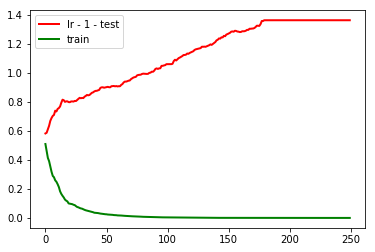

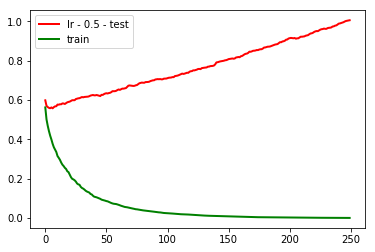

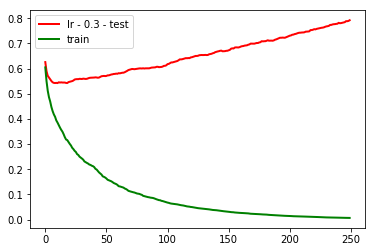

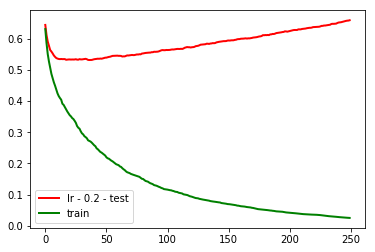

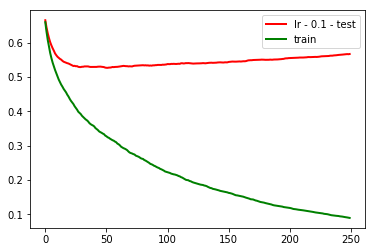

In [21]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

# Convert dataframes to numpy arrays
X = df_data_1.drop(labels=['Activity'],axis=1).values
y = np.ravel(df_data_1['Activity'].values)

#Split to train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=241)

#clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,learning_rate=lr)
#    clf.fit(X_train,y_train)


lr_rates = [1, 0.5, 0.3, 0.2, 0.1]

for lr in lr_rates :
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,learning_rate=lr)
    clf.fit(X_train,y_train)
    print(lr)
    logloss_test = np.empty(len(clf.estimators_))
    logloss_train = np.empty(len(clf.estimators_))
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        y_pred = 1 / (1 + np.exp(-pred))
        logloss_test[i] = log_loss(y_test,y_pred)
#        print (i,logloss)
    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        y_pred = 1 / (1 + np.exp(-pred))
        logloss_train[i] = log_loss(y_train,y_pred)
#        print (i,logloss)
#    print (logloss_train)
#    print (logloss_test)
    plt.figure ()
    plt.plot ( logloss_test, 'r', linewidth = 2)
    plt.plot ( logloss_train, 'g' , linewidth = 2)
    plt.legend (['lr - '+str(lr)+' - test' , 'train'])
    if lr == 0.2 :
        ll_min_iter = np.argmin(logloss_test)+1
        ll_min_value = logloss_test[np.argmin(logloss_test)]
        print 'With learning rate = {0} the min value achieved is {1} on {2} interation'.format(lr, ll_min_value, ll_min_iter)
        
        
#end

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

rf_clf = RandomForestClassifier(n_estimators=ll_min_iter,random_state=241)
rf_clf.fit(X_train,y_train)
predictions = clf.predict_proba(X_test)
logloss_forest = log_loss(y_test,predictions)
print 'The min value achieved is {0:5.3f} with {1} trees deployed in forest'.format(logloss_forest, ll_min_iter)

The min value achieved is 0.567 with 37 trees deployed in forest
